<div>
<img src="https://cdn-images-1.medium.com/max/1024/1*-QTg-_71YF0SVshMEaKZ_g.png" 
   width="400" style="margin: 50px auto; display: block; position: relative; left: -30px;" />
</div>

<!--NAVIGATION-->
<!--NAVIGATION-->
# [PyTorch Primer](1-pytorch.ipynb) | TensorFlow Primer | [PyT vs TF](3-pytorch_vs_tf.ipynb) | [JAX](4-jax.ipynb)

## Submodule -1.4 : A Primer on PyTorch and Tensorflow

## Table of Contents

#### 1. [Installation](#Building-TensorFlow)
#### 3. [Basics of TensorFlow](##Basics-of-TensorFlow)
#### 4. [Automatic Differentiation](#Automatic-Differentiation)



# Building TensorFlow

### Install TensorFlow2

In [ ]:
!pip3 install tensorflow

# Basics of TensorFlow

#### Tensors and Properties

#### Methods on Tensors

###### Sum

In [1]:
import tensorflow as tf
print(f"Version of TF version: {tf.__version__}")

# Set seed for reproducibility
tf.random.set_seed(0)
# Random Matrix of shape=(3,3)
x = tf.random.normal((3,3), mean=0.0, stddev=1.0, dtype=tf.dtypes.float32,\
                     seed=None,name=None)
print(f"x: {x}")


Version of TF version: 2.6.0
x: [[ 1.5110626   0.42292204 -0.41969493]
 [-1.0360372  -1.2368279   0.47027302]
 [-0.01397489  1.1888583   0.60253334]]


###### Reshape : `view` and  `reshape`  methods

In [ ]:
#### Inplace Reshaping
# A vector of length N=10
x = tf.convert_to_tensor([1,2,3,4,5,6,7,8,9,10, 11, 12])

# Reshape in amatrix of shape= (2,5)
print(tf.shape(x).numpy())

x = tf.reshape(x, [4, 3])

print(tf.shape(x).numpy())
print(x)

###### Computing Norm of a vector using `norm` method

$$
L_p~\text{norm}:
||{\mathbf{x}}||_p = \left(\sum_i |x_i|^p\right)^{\frac{1}{p}}
$$


$$
L^1~\text{norm}:
|| {\mathbf{x}} ||_1 = |x_1| + |x_2| + \ldots + |x_n|
$$

$$
L^2~\text{norm}:
|| {\mathbf{x}} ||_2 = \sqrt{x_1^2 + x_2^2 + \ldots + x_n^2}
$$



In [ ]:
tf.random.set_seed(0)
x = tf.random.normal((10,1))
l1 = tf.norm(x, ord=1)
l2 = tf.norm(x, ord=2)

print(f"L1 Norm of x is:{l1}")
print(f"L2 Norm of x is:{l2}")


###### Computing Norm of a vector without using the method

In [ ]:
n1 = tf.reduce_sum(tf.abs(x))
print(f"L1 norm: is: {n1}")
n2 = tf.sqrt(tf.reduce_sum(x**2))
print(f"L2 norm: is: {n2}")


### Tensors on GPU

In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices())
tf.debugging.set_log_device_placement(True)

a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)




[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


### Mapping tensors to GPU

In [ ]:
with tf.device('/CPU:0'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    c = tf.matmul(a, b)

print(c)


### NumPy ----> TensorFlow ----> NumPy

In [3]:
import numpy as np
x = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], dtype=float)
x_tf = tf.convert_to_tensor(x, dtype=tf.float32)
print("*******NumPy To Tensor*******)")
print("Numpy array is:", x)
print("TF Tensor is:", x_tf)
print("*******Tensor To NumPy*******")
print("TF Tensor is:", x_tf.numpy())


*******NumPy To Tensor*******)
Numpy array is: [[1. 2. 3.]
 [4. 5. 6.]]
TF Tensor is: tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
*******Tensor To NumPy*******
TF Tensor is: [[1. 2. 3.]
 [4. 5. 6.]]


### Eager mode and Graph mode


In [2]:
import tensorflow as tf
import timeit

In [11]:
#tf.config.run_functions_eagerly(False)

x = tf.constant([1., 4., 9., 16., 25.])

## Eager Function
def f_e(x):
    y=x ** 2
    print("Evaluted in Eager Mode y:", y)
    return y 


## Explain tf.print and jit_compile=True
@tf.function()
def f_g(x):
    y=x ** 2
    print("Evaluted in Graph Mode y:", y)
    return y 

print("Graph time:", timeit.timeit(lambda: f_g(x), number=1000))
#print("Eager time:", timeit.timeit(lambda: f_e(x), number=1000))


Evaluted in Graph Mode y: Tensor("pow:0", shape=(5,), dtype=float32)
Graph time: 0.16714253500001064


### Function Approximation

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import matplotlib.pyplot as plt


batch_size = 50
x = np.linspace(-1, 1, num=batch_size)
x_eval = np.linspace(-0.8, 0.8, num=batch_size).reshape(-1,1)


y = x**2
# Add Random Noise
y = y + 0.05*np.random.normal(np.shape(y))
#y = 2*((y - np.min(y))/(np.max(y) - np.min(y))) - 1
x = x.reshape((-1, 1))
y = y.reshape((-1, 1)) 

y_eval = x_eval**2
#y_eval = 2*((y_eval - np.min(y_eval))/(np.max(y_eval) - np.min(y_eval))) - 1


### Sequential model
model = keras.Sequential()
model.add(keras.layers.Dense(32, input_dim=x.shape[1],\
                             kernel_initializer='he_normal', \
                             activation="tanh"))


model.add(keras.layers.Dense(32, kernel_initializer='he_normal', \
                             activation="tanh"))
print(model.predict(x).shape)
model.add(keras.layers.Dense(1, kernel_initializer='he_normal', activation='linear'))

model.compile(optimizer='adam', 
                  loss='mse',
                  metrics=['mse'])

model.fit(x, y, epochs=5000, batch_size=np.size(x), verbose=1)

y_pred = model.predict(x, batch_size=np.size(x))





(50, 32)
Epoch 1/5000
1/1 [==============================] - 0s 235ms/step - loss: 8.3717 - mse: 8.3717
Epoch 2/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.2872 - mse: 8.2872
Epoch 3/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.2155 - mse: 8.2155
Epoch 4/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.1500 - mse: 8.1500
Epoch 5/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.0824 - mse: 8.0824
Epoch 6/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.0107 - mse: 8.0107
Epoch 7/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.9366 - mse: 7.9366
Epoch 8/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.8620 - mse: 7.8620
Epoch 9/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.7877 - mse: 7.7877
Epoch 10/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.7134 - mse: 7.7134
Epoch 11/5000
1/1 [==============================] - 0s 1m

1/1 [==============================] - 0s 2ms/step - loss: 0.1971 - mse: 0.1971
Epoch 175/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1960 - mse: 0.1960
Epoch 176/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1950 - mse: 0.1950
Epoch 177/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1940 - mse: 0.1940
Epoch 178/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1930 - mse: 0.1930
Epoch 179/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1919 - mse: 0.1919
Epoch 180/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1909 - mse: 0.1909
Epoch 181/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1899 - mse: 0.1899
Epoch 182/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1888 - mse: 0.1888
Epoch 183/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1878 - mse: 0.1878
Epoch 184/5000
1/1 [==============================] - 0s 1ms/step

1/1 [==============================] - 0s 1ms/step - loss: 0.0325 - mse: 0.0325
Epoch 347/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0320 - mse: 0.0320
Epoch 348/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0316 - mse: 0.0316
Epoch 349/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0311 - mse: 0.0311
Epoch 350/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0307 - mse: 0.0307
Epoch 351/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0303 - mse: 0.0303
Epoch 352/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0298 - mse: 0.0298
Epoch 353/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0294 - mse: 0.0294
Epoch 354/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0290 - mse: 0.0290
Epoch 355/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0286 - mse: 0.0286
Epoch 356/5000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.0079 - mse: 0.0079
Epoch 519/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0079 - mse: 0.0079
Epoch 520/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0078 - mse: 0.0078
Epoch 521/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0078 - mse: 0.0078
Epoch 522/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0077 - mse: 0.0077
Epoch 523/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0077 - mse: 0.0077
Epoch 524/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0076 - mse: 0.0076
Epoch 525/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0076 - mse: 0.0076
Epoch 526/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0076 - mse: 0.0076
Epoch 527/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0075 - mse: 0.0075
Epoch 528/5000
1/1 [==============================] - 0s 1ms/step

1/1 [==============================] - 0s 1ms/step - loss: 0.0031 - mse: 0.0031
Epoch 691/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0031 - mse: 0.0031
Epoch 692/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0031 - mse: 0.0031
Epoch 693/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030
Epoch 694/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030
Epoch 695/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030
Epoch 696/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030
Epoch 697/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030
Epoch 698/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030
Epoch 699/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029
Epoch 700/5000
1/1 [==============================] - 0s 1ms/step

1/1 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015
Epoch 863/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014
Epoch 864/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014
Epoch 865/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014
Epoch 866/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014
Epoch 867/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014
Epoch 868/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014
Epoch 869/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014
Epoch 870/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014
Epoch 871/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014
Epoch 872/5000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step - loss: 9.1743e-04 - mse: 9.1743e-04
Epoch 1031/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.1543e-04 - mse: 9.1543e-04
Epoch 1032/5000
1/1 [==============================] - 0s 1ms/step - loss: 9.1344e-04 - mse: 9.1344e-04
Epoch 1033/5000
1/1 [==============================] - 0s 1ms/step - loss: 9.1146e-04 - mse: 9.1146e-04
Epoch 1034/5000
1/1 [==============================] - 0s 1ms/step - loss: 9.0948e-04 - mse: 9.0948e-04
Epoch 1035/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.0752e-04 - mse: 9.0752e-04
Epoch 1036/5000
1/1 [==============================] - 0s 1ms/step - loss: 9.0556e-04 - mse: 9.0556e-04
Epoch 1037/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.0361e-04 - mse: 9.0361e-04
Epoch 1038/5000
1/1 [==============================] - 0s 1ms/step - loss: 9.0167e-04 - mse: 9.0167e-04
Epoch 1039/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.997

1/1 [==============================] - 0s 2ms/step - loss: 6.7752e-04 - mse: 6.7752e-04
Epoch 1187/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.7631e-04 - mse: 6.7631e-04
Epoch 1188/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.7510e-04 - mse: 6.7510e-04
Epoch 1189/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.7389e-04 - mse: 6.7389e-04
Epoch 1190/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.7269e-04 - mse: 6.7269e-04
Epoch 1191/5000
1/1 [==============================] - 0s 1ms/step - loss: 6.7149e-04 - mse: 6.7149e-04
Epoch 1192/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.7029e-04 - mse: 6.7029e-04
Epoch 1193/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.6909e-04 - mse: 6.6909e-04
Epoch 1194/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.6790e-04 - mse: 6.6790e-04
Epoch 1195/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.667

1/1 [==============================] - 0s 2ms/step - loss: 5.1487e-04 - mse: 5.1487e-04
Epoch 1343/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.1397e-04 - mse: 5.1397e-04
Epoch 1344/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.1306e-04 - mse: 5.1306e-04
Epoch 1345/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.1216e-04 - mse: 5.1216e-04
Epoch 1346/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.1125e-04 - mse: 5.1125e-04
Epoch 1347/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.1035e-04 - mse: 5.1035e-04
Epoch 1348/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.0944e-04 - mse: 5.0944e-04
Epoch 1349/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.0855e-04 - mse: 5.0855e-04
Epoch 1350/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.0765e-04 - mse: 5.0765e-04
Epoch 1351/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.067

1/1 [==============================] - 0s 2ms/step - loss: 3.8718e-04 - mse: 3.8718e-04
Epoch 1499/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.8644e-04 - mse: 3.8644e-04
Epoch 1500/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.8571e-04 - mse: 3.8571e-04
Epoch 1501/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.8497e-04 - mse: 3.8497e-04
Epoch 1502/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.8423e-04 - mse: 3.8423e-04
Epoch 1503/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.8349e-04 - mse: 3.8349e-04
Epoch 1504/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.8276e-04 - mse: 3.8276e-04
Epoch 1505/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.8202e-04 - mse: 3.8202e-04
Epoch 1506/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.8129e-04 - mse: 3.8129e-04
Epoch 1507/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.805

1/1 [==============================] - 0s 2ms/step - loss: 2.8186e-04 - mse: 2.8186e-04
Epoch 1655/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.8125e-04 - mse: 2.8125e-04
Epoch 1656/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.8063e-04 - mse: 2.8063e-04
Epoch 1657/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.8002e-04 - mse: 2.8002e-04
Epoch 1658/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.7941e-04 - mse: 2.7941e-04
Epoch 1659/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.7880e-04 - mse: 2.7880e-04
Epoch 1660/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.7819e-04 - mse: 2.7819e-04
Epoch 1661/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.7758e-04 - mse: 2.7758e-04
Epoch 1662/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.7698e-04 - mse: 2.7698e-04
Epoch 1663/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.763

1/1 [==============================] - 0s 2ms/step - loss: 1.9560e-04 - mse: 1.9560e-04
Epoch 1811/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.9511e-04 - mse: 1.9511e-04
Epoch 1812/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.9461e-04 - mse: 1.9461e-04
Epoch 1813/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9412e-04 - mse: 1.9412e-04
Epoch 1814/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9364e-04 - mse: 1.9364e-04
Epoch 1815/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9315e-04 - mse: 1.9315e-04
Epoch 1816/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9266e-04 - mse: 1.9266e-04
Epoch 1817/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9217e-04 - mse: 1.9217e-04
Epoch 1818/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9169e-04 - mse: 1.9169e-04
Epoch 1819/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.912

1/1 [==============================] - 0s 2ms/step - loss: 1.2899e-04 - mse: 1.2899e-04
Epoch 1967/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.2863e-04 - mse: 1.2863e-04
Epoch 1968/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.2827e-04 - mse: 1.2827e-04
Epoch 1969/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2791e-04 - mse: 1.2791e-04
Epoch 1970/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.2755e-04 - mse: 1.2755e-04
Epoch 1971/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.2720e-04 - mse: 1.2720e-04
Epoch 1972/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.2684e-04 - mse: 1.2684e-04
Epoch 1973/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.2649e-04 - mse: 1.2649e-04
Epoch 1974/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.2613e-04 - mse: 1.2613e-04
Epoch 1975/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.257

1/1 [==============================] - 0s 2ms/step - loss: 8.3119e-05 - mse: 8.3119e-05
Epoch 2123/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.2889e-05 - mse: 8.2889e-05
Epoch 2124/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.2662e-05 - mse: 8.2662e-05
Epoch 2125/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.2432e-05 - mse: 8.2432e-05
Epoch 2126/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.2206e-05 - mse: 8.2206e-05
Epoch 2127/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.1979e-05 - mse: 8.1979e-05
Epoch 2128/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.1755e-05 - mse: 8.1755e-05
Epoch 2129/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.1530e-05 - mse: 8.1530e-05
Epoch 2130/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.1307e-05 - mse: 8.1307e-05
Epoch 2131/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.108

1/1 [==============================] - 0s 2ms/step - loss: 5.5979e-05 - mse: 5.5979e-05
Epoch 2279/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.5854e-05 - mse: 5.5854e-05
Epoch 2280/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.5730e-05 - mse: 5.5730e-05
Epoch 2281/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.5607e-05 - mse: 5.5607e-05
Epoch 2282/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.5484e-05 - mse: 5.5484e-05
Epoch 2283/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.5361e-05 - mse: 5.5361e-05
Epoch 2284/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.5239e-05 - mse: 5.5239e-05
Epoch 2285/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.5117e-05 - mse: 5.5117e-05
Epoch 2286/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.4996e-05 - mse: 5.4996e-05
Epoch 2287/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.487

1/1 [==============================] - 0s 2ms/step - loss: 4.1914e-05 - mse: 4.1914e-05
Epoch 2435/5000
1/1 [==============================] - 0s 1ms/step - loss: 4.1852e-05 - mse: 4.1852e-05
Epoch 2436/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.1789e-05 - mse: 4.1789e-05
Epoch 2437/5000
1/1 [==============================] - 0s 1ms/step - loss: 4.1729e-05 - mse: 4.1729e-05
Epoch 2438/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.1668e-05 - mse: 4.1668e-05
Epoch 2439/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.1606e-05 - mse: 4.1606e-05
Epoch 2440/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.1546e-05 - mse: 4.1546e-05
Epoch 2441/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.1485e-05 - mse: 4.1485e-05
Epoch 2442/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.1425e-05 - mse: 4.1425e-05
Epoch 2443/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.136

1/1 [==============================] - 0s 2ms/step - loss: 3.4840e-05 - mse: 3.4840e-05
Epoch 2591/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.4808e-05 - mse: 3.4808e-05
Epoch 2592/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.4775e-05 - mse: 3.4775e-05
Epoch 2593/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.4744e-05 - mse: 3.4744e-05
Epoch 2594/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.4711e-05 - mse: 3.4711e-05
Epoch 2595/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.4679e-05 - mse: 3.4679e-05
Epoch 2596/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.4647e-05 - mse: 3.4647e-05
Epoch 2597/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.4615e-05 - mse: 3.4615e-05
Epoch 2598/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.4583e-05 - mse: 3.4583e-05
Epoch 2599/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.455

1/1 [==============================] - 0s 2ms/step - loss: 3.0999e-05 - mse: 3.0999e-05
Epoch 2747/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.0980e-05 - mse: 3.0980e-05
Epoch 2748/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.0960e-05 - mse: 3.0960e-05
Epoch 2749/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.0941e-05 - mse: 3.0941e-05
Epoch 2750/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.0922e-05 - mse: 3.0922e-05
Epoch 2751/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.0903e-05 - mse: 3.0903e-05
Epoch 2752/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.0883e-05 - mse: 3.0883e-05
Epoch 2753/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.0864e-05 - mse: 3.0864e-05
Epoch 2754/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.0845e-05 - mse: 3.0845e-05
Epoch 2755/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.082

1/1 [==============================] - 0s 3ms/step - loss: 2.8483e-05 - mse: 2.8483e-05
Epoch 2903/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.8480e-05 - mse: 2.8480e-05
Epoch 2904/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.8487e-05 - mse: 2.8487e-05
Epoch 2905/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.8487e-05 - mse: 2.8487e-05
Epoch 2906/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.8473e-05 - mse: 2.8473e-05
Epoch 2907/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.8447e-05 - mse: 2.8447e-05
Epoch 2908/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.8417e-05 - mse: 2.8417e-05
Epoch 2909/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.8392e-05 - mse: 2.8392e-05
Epoch 2910/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.8376e-05 - mse: 2.8376e-05
Epoch 2911/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.836

1/1 [==============================] - 0s 3ms/step - loss: 3.3963e-05 - mse: 3.3963e-05
Epoch 3059/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.2501e-05 - mse: 3.2501e-05
Epoch 3060/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.9114e-05 - mse: 2.9114e-05
Epoch 3061/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.6809e-05 - mse: 2.6809e-05
Epoch 3062/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.7107e-05 - mse: 2.7107e-05
Epoch 3063/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.9023e-05 - mse: 2.9023e-05
Epoch 3064/5000
1/1 [==============================] - 0s 4ms/step - loss: 3.0406e-05 - mse: 3.0406e-05
Epoch 3065/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.9991e-05 - mse: 2.9991e-05
Epoch 3066/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.8298e-05 - mse: 2.8298e-05
Epoch 3067/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.683

1/1 [==============================] - 0s 1ms/step - loss: 2.5254e-05 - mse: 2.5254e-05
Epoch 3215/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.5247e-05 - mse: 2.5247e-05
Epoch 3216/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.5242e-05 - mse: 2.5242e-05
Epoch 3217/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.5238e-05 - mse: 2.5238e-05
Epoch 3218/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.5236e-05 - mse: 2.5236e-05
Epoch 3219/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.5238e-05 - mse: 2.5238e-05
Epoch 3220/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.5243e-05 - mse: 2.5243e-05
Epoch 3221/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.5256e-05 - mse: 2.5256e-05
Epoch 3222/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.5281e-05 - mse: 2.5281e-05
Epoch 3223/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.532

1/1 [==============================] - 0s 2ms/step - loss: 2.4147e-05 - mse: 2.4147e-05
Epoch 3371/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.4140e-05 - mse: 2.4140e-05
Epoch 3372/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.4133e-05 - mse: 2.4133e-05
Epoch 3373/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.4127e-05 - mse: 2.4127e-05
Epoch 3374/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.4120e-05 - mse: 2.4120e-05
Epoch 3375/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.4114e-05 - mse: 2.4114e-05
Epoch 3376/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.4108e-05 - mse: 2.4108e-05
Epoch 3377/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.4101e-05 - mse: 2.4101e-05
Epoch 3378/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.4095e-05 - mse: 2.4095e-05
Epoch 3379/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.408

1/1 [==============================] - 0s 3ms/step - loss: 2.3272e-05 - mse: 2.3272e-05
Epoch 3527/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.3240e-05 - mse: 2.3240e-05
Epoch 3528/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.3308e-05 - mse: 2.3308e-05
Epoch 3529/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.3387e-05 - mse: 2.3387e-05
Epoch 3530/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.3402e-05 - mse: 2.3402e-05
Epoch 3531/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.3340e-05 - mse: 2.3340e-05
Epoch 3532/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.3254e-05 - mse: 2.3254e-05
Epoch 3533/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.3206e-05 - mse: 2.3206e-05
Epoch 3534/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.3215e-05 - mse: 2.3215e-05
Epoch 3535/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.325

1/1 [==============================] - 0s 2ms/step - loss: 2.4265e-05 - mse: 2.4265e-05
Epoch 3683/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.5287e-05 - mse: 2.5287e-05
Epoch 3684/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.6924e-05 - mse: 2.6924e-05
Epoch 3685/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.9551e-05 - mse: 2.9551e-05
Epoch 3686/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.3768e-05 - mse: 3.3768e-05
Epoch 3687/5000
1/1 [==============================] - 0s 1ms/step - loss: 4.0507e-05 - mse: 4.0507e-05
Epoch 3688/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.1175e-05 - mse: 5.1175e-05
Epoch 3689/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.7701e-05 - mse: 6.7701e-05
Epoch 3690/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.2361e-05 - mse: 9.2361e-05
Epoch 3691/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.266

1/1 [==============================] - 0s 1ms/step - loss: 2.1837e-05 - mse: 2.1837e-05
Epoch 3839/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.1834e-05 - mse: 2.1834e-05
Epoch 3840/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.1829e-05 - mse: 2.1829e-05
Epoch 3841/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.1826e-05 - mse: 2.1826e-05
Epoch 3842/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.1822e-05 - mse: 2.1822e-05
Epoch 3843/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.1818e-05 - mse: 2.1818e-05
Epoch 3844/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.1814e-05 - mse: 2.1814e-05
Epoch 3845/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.1810e-05 - mse: 2.1810e-05
Epoch 3846/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.1807e-05 - mse: 2.1807e-05
Epoch 3847/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.180

1/1 [==============================] - 0s 2ms/step - loss: 2.1307e-05 - mse: 2.1307e-05
Epoch 3995/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.1551e-05 - mse: 2.1551e-05
Epoch 3996/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.1716e-05 - mse: 2.1716e-05
Epoch 3997/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.1576e-05 - mse: 2.1576e-05
Epoch 3998/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.1333e-05 - mse: 2.1333e-05
Epoch 3999/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.1280e-05 - mse: 2.1280e-05
Epoch 4000/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.1421e-05 - mse: 2.1421e-05
Epoch 4001/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.1521e-05 - mse: 2.1521e-05
Epoch 4002/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.1445e-05 - mse: 2.1445e-05
Epoch 4003/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.129

1/1 [==============================] - 0s 2ms/step - loss: 2.0793e-05 - mse: 2.0793e-05
Epoch 4151/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0790e-05 - mse: 2.0790e-05
Epoch 4152/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0786e-05 - mse: 2.0786e-05
Epoch 4153/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0784e-05 - mse: 2.0784e-05
Epoch 4154/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0781e-05 - mse: 2.0781e-05
Epoch 4155/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0778e-05 - mse: 2.0778e-05
Epoch 4156/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0775e-05 - mse: 2.0775e-05
Epoch 4157/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0772e-05 - mse: 2.0772e-05
Epoch 4158/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0769e-05 - mse: 2.0769e-05
Epoch 4159/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.076

1/1 [==============================] - 0s 2ms/step - loss: 2.1025e-05 - mse: 2.1025e-05
Epoch 4307/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.0894e-05 - mse: 2.0894e-05
Epoch 4308/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0567e-05 - mse: 2.0567e-05
Epoch 4309/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0354e-05 - mse: 2.0354e-05
Epoch 4310/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0403e-05 - mse: 2.0403e-05
Epoch 4311/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0593e-05 - mse: 2.0593e-05
Epoch 4312/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.0703e-05 - mse: 2.0703e-05
Epoch 4313/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0628e-05 - mse: 2.0628e-05
Epoch 4314/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0452e-05 - mse: 2.0452e-05
Epoch 4315/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.033

1/1 [==============================] - 0s 4ms/step - loss: 1.9947e-05 - mse: 1.9947e-05
Epoch 4463/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9944e-05 - mse: 1.9944e-05
Epoch 4464/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.9941e-05 - mse: 1.9941e-05
Epoch 4465/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9939e-05 - mse: 1.9939e-05
Epoch 4466/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9936e-05 - mse: 1.9936e-05
Epoch 4467/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.9934e-05 - mse: 1.9934e-05
Epoch 4468/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.9930e-05 - mse: 1.9930e-05
Epoch 4469/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.9928e-05 - mse: 1.9928e-05
Epoch 4470/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9926e-05 - mse: 1.9926e-05
Epoch 4471/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.992

1/1 [==============================] - 0s 2ms/step - loss: 1.9587e-05 - mse: 1.9587e-05
Epoch 4619/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.9580e-05 - mse: 1.9580e-05
Epoch 4620/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.9580e-05 - mse: 1.9580e-05
Epoch 4621/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9582e-05 - mse: 1.9582e-05
Epoch 4622/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9581e-05 - mse: 1.9581e-05
Epoch 4623/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9576e-05 - mse: 1.9576e-05
Epoch 4624/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9570e-05 - mse: 1.9570e-05
Epoch 4625/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.9568e-05 - mse: 1.9568e-05
Epoch 4626/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9566e-05 - mse: 1.9566e-05
Epoch 4627/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.956

1/1 [==============================] - 0s 1ms/step - loss: 1.9237e-05 - mse: 1.9237e-05
Epoch 4775/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.9235e-05 - mse: 1.9235e-05
Epoch 4776/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9232e-05 - mse: 1.9232e-05
Epoch 4777/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.9230e-05 - mse: 1.9230e-05
Epoch 4778/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9228e-05 - mse: 1.9228e-05
Epoch 4779/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9226e-05 - mse: 1.9226e-05
Epoch 4780/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9223e-05 - mse: 1.9223e-05
Epoch 4781/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9221e-05 - mse: 1.9221e-05
Epoch 4782/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9220e-05 - mse: 1.9220e-05
Epoch 4783/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.921

1/1 [==============================] - 0s 2ms/step - loss: 1.8935e-05 - mse: 1.8935e-05
Epoch 4931/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.8938e-05 - mse: 1.8938e-05
Epoch 4932/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.8930e-05 - mse: 1.8930e-05
Epoch 4933/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.8916e-05 - mse: 1.8916e-05
Epoch 4934/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.8906e-05 - mse: 1.8906e-05
Epoch 4935/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.8906e-05 - mse: 1.8906e-05
Epoch 4936/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.8910e-05 - mse: 1.8910e-05
Epoch 4937/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.8913e-05 - mse: 1.8913e-05
Epoch 4938/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.8911e-05 - mse: 1.8911e-05
Epoch 4939/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.890

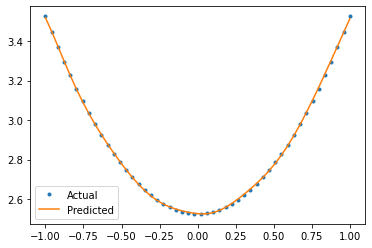

In [10]:
plt.plot(x, y, ".", label="Actual")
plt.plot(x, y_pred, "-", label="Predicted")
plt.legend()

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________
